In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model, np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import datetime

# Sushi image data loading
train = np.load('/content/drive/My Drive/Colab Notebooks/train_0415.npy')
label = np.load('/content/drive/My Drive/Colab Notebooks/label_0415.npy')

# shuffle
alldata = []
for i in range(len(train)):
    alldata.append((train[i], label[i]))
random.shuffle(alldata)

# split
train = []
label = []
for data, idx in alldata:
    train.append(data)
    label.append(idx)

train = np.array(train)
label = np.array(label)

train_data, test_data, train_label, test_label = train_test_split(train, label, test_size=0.1)
np.save('/content/drive/My Drive/Colab Notebooks/test_data.npy', test_data)
np.save('/content/drive/My Drive/Colab Notebooks/test_label.npy', test_label)
print(train_data.shape, test_data.shape)

Using TensorFlow backend.


(539, 128, 128, 3) (60, 128, 128, 3)


In [0]:
# model definition
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64, 3, input_shape=train_data.shape[1:]),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Conv2D(64,3),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),

                             tf.keras.layers.Conv2D(128, 3),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),

                             keras.layers.Flatten(),
                             keras.layers.Dense(64, activation='relu'),
                             keras.layers.Dropout(0.5),
                             keras.layers.Dense(3, activation='softmax')

                            #  keras.layers.Flatten(input_shape=train_data.shape[1:]),
                            #  keras.layers.Dense(128, activation='relu'),
                            #  keras.layers.Dense(3, activation='softmax')                          
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
dense_2 (Dense)              (None, 126, 126, 64)      4160      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
dense_3 (Dense)              (None, 124, 124, 64)      4160      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
dense_4 (Dense)              (None, 60, 60, 128)      

In [0]:
# training model
num = 15
result = model.fit(train_data, train_label, epochs=num, validation_data=(test_data, test_label))

# saving model
json_model = model.to_json()
with open('/content/drive/My Drive/Colab Notebooks/model_0415.json', mode='w') as f:
  f.write(json_model)

model.save_weights('/content/drive/My Drive/Colab Notebooks/weights_0415.hdf5')

# evaluation model
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
print('\nTest accuracy: ', test_acc)

Epoch 1/15
17/17 [==============================] - 3s 161ms/step - loss: 1.9463 - accuracy: 0.4601 - val_loss: 0.5924 - val_accuracy: 0.7500
Epoch 2/15
17/17 [==============================] - 1s 87ms/step - loss: 0.3911 - accuracy: 0.8349 - val_loss: 0.1678 - val_accuracy: 0.9000
Epoch 3/15
17/17 [==============================] - 1s 87ms/step - loss: 0.1900 - accuracy: 0.9239 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/15
17/17 [==============================] - 1s 87ms/step - loss: 0.0627 - accuracy: 0.9777 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/15
17/17 [==============================] - 1s 87ms/step - loss: 0.0499 - accuracy: 0.9796 - val_loss: 4.4595e-04 - val_accuracy: 1.0000
Epoch 6/15
17/17 [==============================] - 1s 87ms/step - loss: 0.0374 - accuracy: 0.9870 - val_loss: 5.6892e-06 - val_accuracy: 1.0000
Epoch 7/15
17/17 [==============================] - 1s 87ms/step - loss: 0.0194 - accuracy: 0.9889 - val_loss: 5.5509e-06 - val_accuracy: 1.0000


In [0]:
# graph plot
date = datetime.datetime.now()
acc = result.history['acc']
val_acc = result.history['val_acc']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title(f'Training & validation accuracy on {date.year}/{date.month}/{date.day}')
plt.legend()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/acc_0327')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title(f'Training & validation loss on {date.year}/{date.month}/{date.day}')
plt.legend()
# plt.savefig('/content/drive/My Drive/Colab Notebooks/loss_0325')

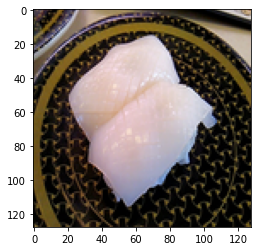

predict result:  [[0. 1. 0.]]
predict answer:  はま寿司


In [0]:
# prediction
from PIL import Image
from keras.models import model_from_json
# model = tf.keras.models.model_from_json(open('/content/drive/My Drive/Colab Notebooks/model_0325.json').read())
# model.load_weights('/content/drive/My Drive/Colab Notebooks/weights_0325.hdf5')
image = Image.open('/content/drive/My Drive/Colab Notebooks/test_image/hama_1.jpg')
conv = image.convert('RGB')
conv = conv.resize((128, 128), Image.ANTIALIAS)
img_data = np.asarray(conv)
img_data = np.expand_dims(img_data, axis=0)
img_data = img_data.astype('float32')
img_data = img_data / 255.0

shop_name = ['スシロー', 'はま寿司', 'かっぱ寿司']

prediction = model.predict(img_data)
plt.imshow(conv)
plt.show()
print("predict result: ", prediction)
print("predict answer: ", shop_name[np.argmax(prediction)])